# 1 -Importantion et nettoyage des données

## 1-1- Installation des bibliotheques

In [508]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 


## 1-2- Importation des données

In [3]:
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [4]:
# Information sur les variables 
print(statlog_german_credit_data.variables) 


           name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categ

In [5]:
X

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201


In [6]:
y

,class
0,1
1,2
2,1
3,1
4,2
...,...
995,1
996,1
997,1
998,2


## 1-3- Convertissons les données 

In [8]:
# Dictionnaires de correspondance en francais
attribute_mappings = {
    'Statut_du_compte_de_controle_existant': {
        'A11': '< 0 DM',
        'A12': '0 <= ... < 200 DM',
        'A13': '>= 200 DM / les missions salariales depuis au moins 1 an',
        'A14': 'pas de compte courant'
    },
    'Historique_credit': {
        'A30': 'aucun credit n a ete pris/tous les credits ont ete rembourses en bonne et due forme',
        'A31': 'tous les credits de cette banque ont ete rembourses en bonne et due forme',
        'A32': 'les credits existants ont ete rembourses en bonne et due forme jusqu a present',
        'A33': 'retard dans le remboursement dans le passe',
        'A34': 'compte critique/autres credits existants (pas dans cette banque)'
     
    },
    'But': {
        'A40': 'voiture (neuve)',
        'A41': 'voiture (utilisee)',
        'A42': 'fourniture/equipement',
        'A43': 'radio/television',
        'A44': 'appareils menagers',
        'A45': 'reparations',
        'A46': 'education',
        'A47': '(vacances - n existe pas ?)',
        'A48': 'recyclage',
        'A49': 'business',
        'A410': 'autres'
    },
    'Obligations_sur_compte_epargne': {
        'A61': 'petite',
        'A62': 'modere',
        'A63': 'riche',
        'A64': 'quitte la richesse',
        'A65': 'inconnu/ pas de compte d epargne'
    },
    'Emploi_actuel_depuis': {
        'A71': 'sans emploi',
        'A72': '< 1 an',
        'A73': '1 <= ... < 4 ans',
        'A74': '4 <= ... < 7 ans',
        'A75': '>= 7 ans'
    },
    'Status_personnel_et_sexe': {
        'A91': 'homme : divorce/separe',
        'A92': 'femme : divorce/separe/marrie',
        'A93': 'homme : seul',
        'A94': 'homme : marrie/voeuf',
        'A95': 'femme : seule'
    },
    'Autres_débiteurs_ou_garants': {
        'A101': 'aucun',
        'A102': 'codemandeur',
        'A103': 'guarant'
    },
    'Propriete': {
        'A121': 'biens immobiliers',
        'A122': 'contrat d epargne-logement/assurance-vie',
        'A123': 'voiture ou autre',
        'A124': 'inconnu/aucun bien'
    },
    
    'Autres_plans_de_versement': {
        'A141': 'banque',
        'A142': 'boutique',
        'A143': 'magasin'
    },
    'Logement': {
        'A151': 'location',
        'A152': 'propritaire',
        'A153': 'gratuit'
    },
    'Job': {
        'A171': 'non qualifie - non resident',
        'A172': 'non qualifie - resident',
        'A173': 'employe / fonctionnaire qualifie',
        'A174': 'cadre / independant / employe hautement qualifie / fonctionnaire'
    },

    'Telephone': {
        'A191': 'aucun',
        'A192': 'oui, enregistre avec le nom du client'
    },
    'Travalleur_etranger': {
        'A201': 'oui',
        'A202': 'non'
    }
}

In [9]:
attribute_mappings

{'Statut_du_compte_de_controle_existant': {'A11': '< 0 DM',
  'A12': '0 <= ... < 200 DM',
  'A13': '>= 200 DM / les missions salariales depuis au moins 1 an',
  'A14': 'pas de compte courant'},
 'Historique_credit': {'A30': 'aucun credit n a ete pris/tous les credits ont ete rembourses en bonne et due forme',
  'A31': 'tous les credits de cette banque ont ete rembourses en bonne et due forme',
  'A32': 'les credits existants ont ete rembourses en bonne et due forme jusqu a present',
  'A33': 'retard dans le remboursement dans le passe',
  'A34': 'compte critique/autres credits existants (pas dans cette banque)'},
 'But': {'A40': 'voiture (neuve)',
  'A41': 'voiture (utilisee)',
  'A42': 'fourniture/equipement',
  'A43': 'radio/television',
  'A44': 'appareils menagers',
  'A45': 'reparations',
  'A46': 'education',
  'A47': '(vacances - n existe pas ?)',
  'A48': 'recyclage',
  'A49': 'business',
  'A410': 'autres'},
 'Obligations_sur_compte_epargne': {'A61': 'petite',
  'A62': 'modere

In [10]:
import pandas as pd

# Exemple de DataFrame original
data = {
    'Statut_du_compte_de_controle_existant': ['A11', 'A12', 'A13', 'A14', 'A11'],
    'Historique_credit': ['A30', 'A31', 'A32', 'A33', 'A34'],
    'But': ['A40', 'A41', 'A42', 'A43', 'A44'],
    'Obligations_sur_compte_epargne': ['A61', 'A62', 'A63', 'A64', 'A65'],
    'Emploi_actuel_depuis': ['A71', 'A72', 'A73', 'A74', 'A75'],
    'Status_personnel_et_sexe': ['A91', 'A92', 'A93', 'A94', 'A95'],
    'Autres_débiteurs_ou_garants': ['A101', 'A102', 'A103', 'A101', 'A102'],
    'Propriete': ['A121', 'A122', 'A123', 'A124', 'A121'],
    'Autres_plans_de_versement': ['A141', 'A142', 'A143', 'A141', 'A142'],
    'Logement': ['A151', 'A152', 'A153', 'A151', 'A152'],
    'Job': ['A171', 'A172', 'A173', 'A174', 'A171'],
    'Telephone': ['A191', 'A192', 'A191', 'A192', 'A191'],
    'Travalleur_etranger': ['A201', 'A202', 'A201', 'A202', 'A201']
}
x = pd.DataFrame(data)
x


,Statut_du_compte_de_controle_existant,Historique_credit,But,Obligations_sur_compte_epargne,Emploi_actuel_depuis,Status_personnel_et_sexe,Autres_débiteurs_ou_garants,Propriete,Autres_plans_de_versement,Logement,Job,Telephone,Travalleur_etranger
0,A11,A30,A40,A61,A71,A91,A101,A121,A141,A151,A171,A191,A201
1,A12,A31,A41,A62,A72,A92,A102,A122,A142,A152,A172,A192,A202
2,A13,A32,A42,A63,A73,A93,A103,A123,A143,A153,A173,A191,A201
3,A14,A33,A43,A64,A74,A94,A101,A124,A141,A151,A174,A192,A202
4,A11,A34,A44,A65,A75,A95,A102,A121,A142,A152,A171,A191,A201


In [11]:
df_german = x.copy() 
for column, mapping in attribute_mappings.items(): 
    if column in df_german.columns:
        df_german[column] = df_german[column].map(mapping)
        
display(df_german)

,Statut_du_compte_de_controle_existant,Historique_credit,But,Obligations_sur_compte_epargne,Emploi_actuel_depuis,Status_personnel_et_sexe,Autres_débiteurs_ou_garants,Propriete,Autres_plans_de_versement,Logement,Job,Telephone,Travalleur_etranger
0,< 0 DM,aucun credit n a ete pris/tous les credits ont...,voiture (neuve),petite,sans emploi,homme : divorce/separe,aucun,biens immobiliers,banque,location,non qualifie - non resident,aucun,oui
1,0 <= ... < 200 DM,tous les credits de cette banque ont ete rembo...,voiture (utilisee),modere,< 1 an,femme : divorce/separe/marrie,codemandeur,contrat d epargne-logement/assurance-vie,boutique,propritaire,non qualifie - resident,"oui, enregistre avec le nom du client",non
2,>= 200 DM / les missions salariales depuis au ...,les credits existants ont ete rembourses en bo...,fourniture/equipement,riche,1 <= ... < 4 ans,homme : seul,guarant,voiture ou autre,magasin,gratuit,employe / fonctionnaire qualifie,aucun,oui
3,pas de compte courant,retard dans le remboursement dans le passe,radio/television,quitte la richesse,4 <= ... < 7 ans,homme : marrie/voeuf,aucun,inconnu/aucun bien,banque,location,cadre / independant / employe hautement qualif...,"oui, enregistre avec le nom du client",non
4,< 0 DM,compte critique/autres credits existants (pas ...,appareils menagers,inconnu/ pas de compte d epargne,>= 7 ans,femme : seule,codemandeur,biens immobiliers,boutique,propritaire,non qualifie - non resident,aucun,oui


In [12]:
# Mappage des noms réels des attributs
attribute_real_names = {
    'Attribute2': 'Duree_du_credit_en_mois',
    'Attribute5': 'Montant_du_credit',
    'Attribute8': 'Taux_de_remboursement_en_pourcentage_du_revenu_disponible',
    'Attribute11': 'Residence_actuelle_depuis',
    'Attribute13': 'Age_en_annees',
    'Attribute16': 'Nombre_de_credits_existants_dans_cette_banque',
    'Attribute18': 'Nombre_de_personnes_chargées_assurer_la_maintenance'
}

# Sélectionner les variables numériques spécifiques
numeric_attributes = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
df_german_numeriques = X[numeric_attributes].copy()

# Renommer les colonnes avec leurs noms réels
df_german_numeriques.rename(columns=attribute_real_names, inplace=True)

# Afficher un aperçu du nouveau DataFrame
df_german_numeriques.head()


,Duree_du_credit_en_mois,Montant_du_credit,Taux_de_remboursement_en_pourcentage_du_revenu_disponible,Residence_actuelle_depuis,Age_en_annees,Nombre_de_credits_existants_dans_cette_banque,Nombre_de_personnes_chargées_assurer_la_maintenance
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


## 1-4- Description des données

In [15]:
X.describe(include = "all")

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,Attribute11,Attribute12,Attribute13,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,NaN,4,NaN,3,3,NaN,4,NaN,2,2
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,NaN,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201
freq,394,NaN,530,280,NaN,603,339,NaN,548,907,NaN,332,NaN,814,713,NaN,630,NaN,596,963
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,2.845000,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,1.103718,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,1.000000,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,2.000000,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,3.000000,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,4.000000,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


In [16]:
X.describe()

,Attribute2,Attribute5,Attribute8,Attribute11,Attribute13,Attribute16,Attribute18
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [17]:
X.isnull().sum()

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
dtype: int64

In [18]:
X.dtypes

Attribute1     object
Attribute2      int64
Attribute3     object
Attribute4     object
Attribute5      int64
Attribute6     object
Attribute7     object
Attribute8      int64
Attribute9     object
Attribute10    object
Attribute11     int64
Attribute12    object
Attribute13     int64
Attribute14    object
Attribute15    object
Attribute16     int64
Attribute17    object
Attribute18     int64
Attribute19    object
Attribute20    object
dtype: object

In [19]:
y.describe()

,class
count,1000.000000
mean,1.300000
std,0.458487
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [20]:
df_german.describe()

,Statut_du_compte_de_controle_existant,Historique_credit,But,Obligations_sur_compte_epargne,Emploi_actuel_depuis,Status_personnel_et_sexe,Autres_débiteurs_ou_garants,Propriete,Autres_plans_de_versement,Logement,Job,Telephone,Travalleur_etranger
count,5,5,5,5,5,5,5,5,5,5,5,5,5
unique,4,5,5,5,5,5,3,4,3,3,4,2,2
top,< 0 DM,aucun credit n a ete pris/tous les credits ont...,voiture (neuve),petite,sans emploi,homme : divorce/separe,aucun,biens immobiliers,banque,location,non qualifie - non resident,aucun,oui
freq,2,1,1,1,1,1,2,2,2,2,2,3,3


In [21]:
df_credit_german = pd.concat([df_german, df_german_numeriques], axis = 1)
df_credit_german.head()

,Statut_du_compte_de_controle_existant,Historique_credit,But,Obligations_sur_compte_epargne,Emploi_actuel_depuis,Status_personnel_et_sexe,Autres_débiteurs_ou_garants,Propriete,Autres_plans_de_versement,Logement,Job,Telephone,Travalleur_etranger,Duree_du_credit_en_mois,Montant_du_credit,Taux_de_remboursement_en_pourcentage_du_revenu_disponible,Residence_actuelle_depuis,Age_en_annees,Nombre_de_credits_existants_dans_cette_banque,Nombre_de_personnes_chargées_assurer_la_maintenance
0,< 0 DM,aucun credit n a ete pris/tous les credits ont...,voiture (neuve),petite,sans emploi,homme : divorce/separe,aucun,biens immobiliers,banque,location,non qualifie - non resident,aucun,oui,6,1169,4,4,67,2,1
1,0 <= ... < 200 DM,tous les credits de cette banque ont ete rembo...,voiture (utilisee),modere,< 1 an,femme : divorce/separe/marrie,codemandeur,contrat d epargne-logement/assurance-vie,boutique,propritaire,non qualifie - resident,"oui, enregistre avec le nom du client",non,48,5951,2,2,22,1,1
2,>= 200 DM / les missions salariales depuis au ...,les credits existants ont ete rembourses en bo...,fourniture/equipement,riche,1 <= ... < 4 ans,homme : seul,guarant,voiture ou autre,magasin,gratuit,employe / fonctionnaire qualifie,aucun,oui,12,2096,2,3,49,1,2
3,pas de compte courant,retard dans le remboursement dans le passe,radio/television,quitte la richesse,4 <= ... < 7 ans,homme : marrie/voeuf,aucun,inconnu/aucun bien,banque,location,cadre / independant / employe hautement qualif...,"oui, enregistre avec le nom du client",non,42,7882,2,4,45,1,2
4,< 0 DM,compte critique/autres credits existants (pas ...,appareils menagers,inconnu/ pas de compte d epargne,>= 7 ans,femme : seule,codemandeur,biens immobiliers,boutique,propritaire,non qualifie - non resident,aucun,oui,24,4870,3,4,53,2,2


In [22]:
y["class"].unique()

array([1, 2], dtype=int64)

In [23]:
y["class"].value_counts(normalize = "True")

class
1    0.7
2    0.3
Name: proportion, dtype: float64

# 2- Analyse de la distribution des données

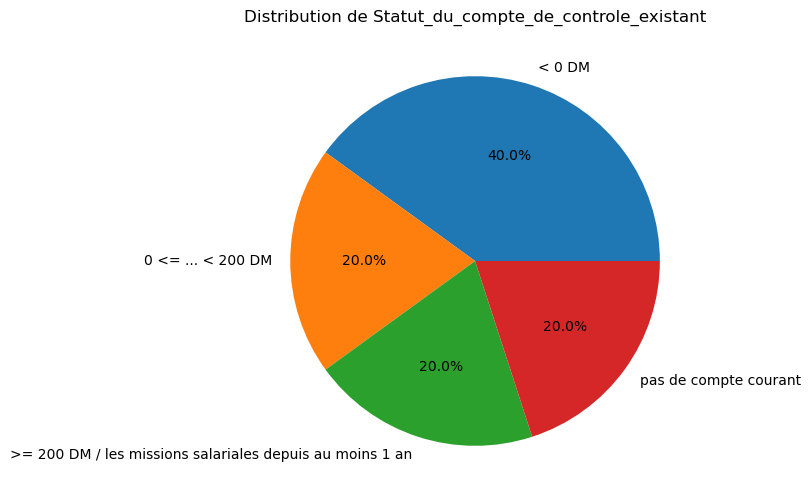

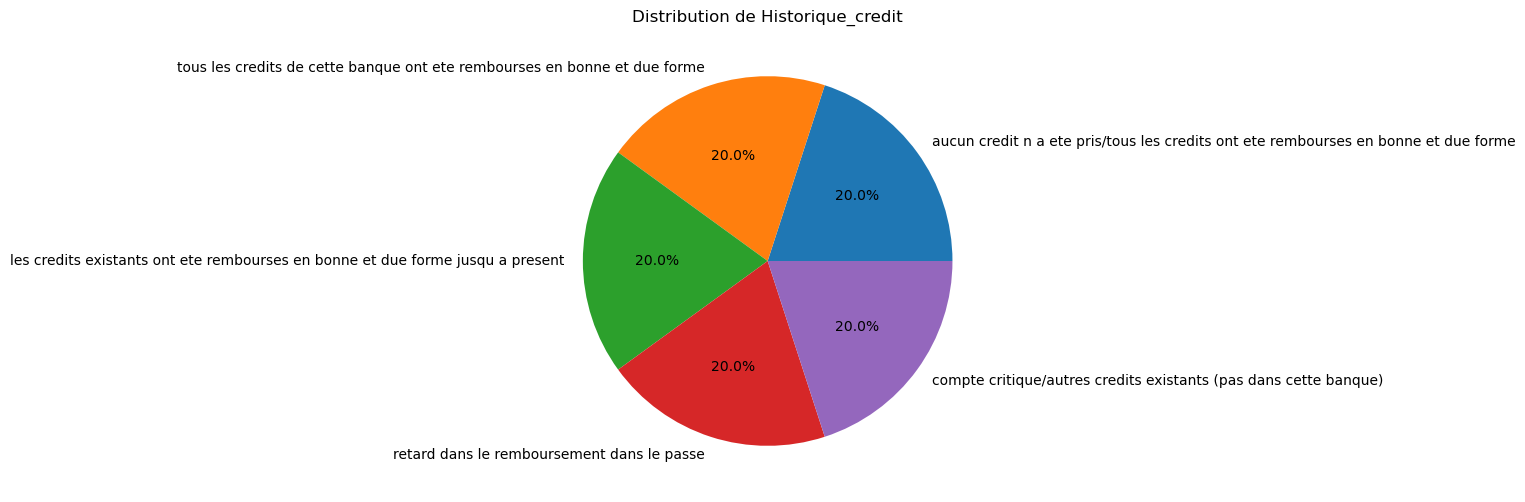

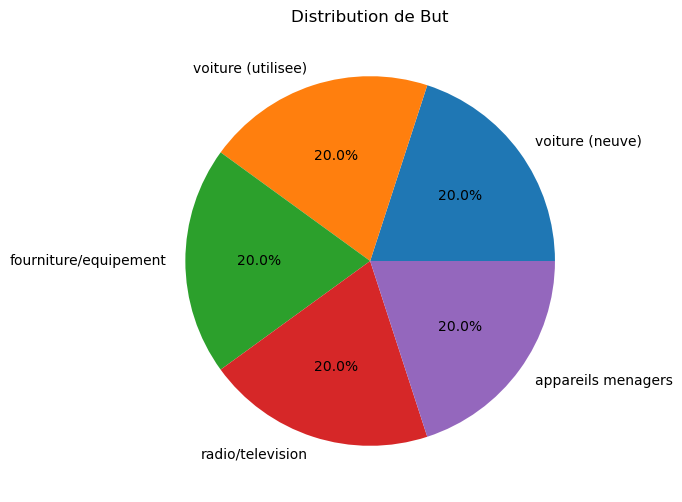

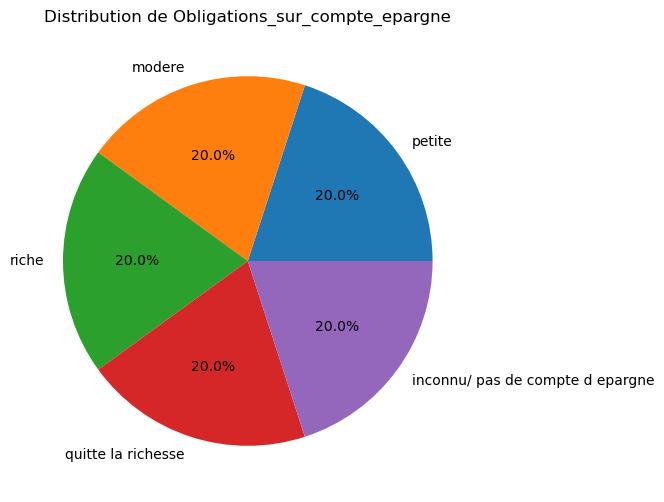

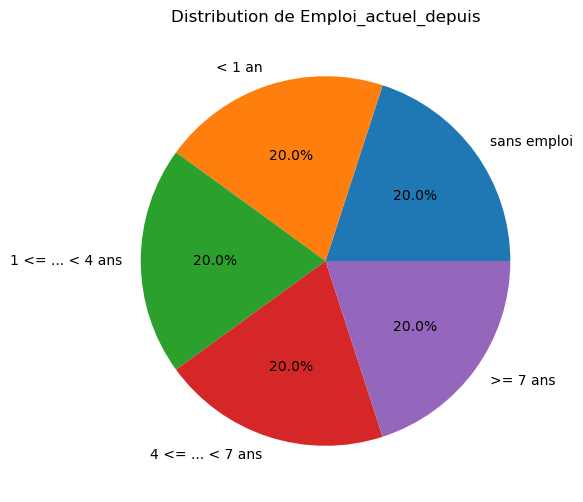

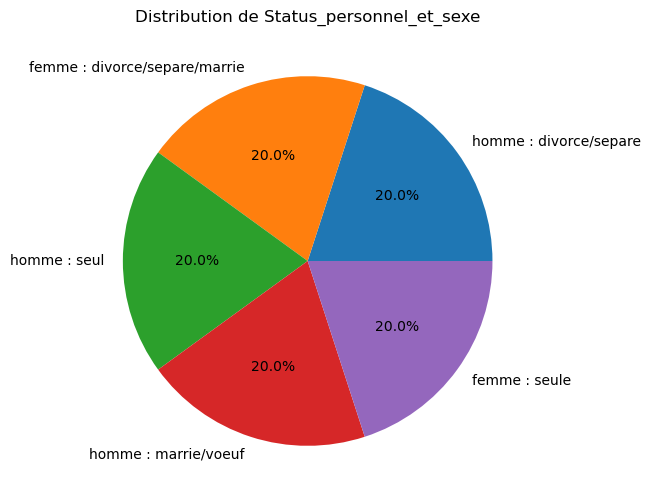

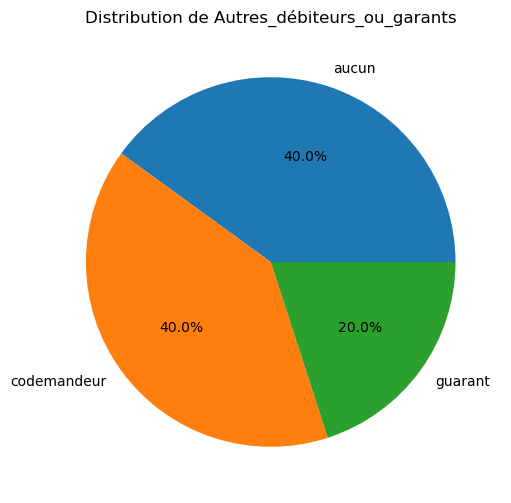

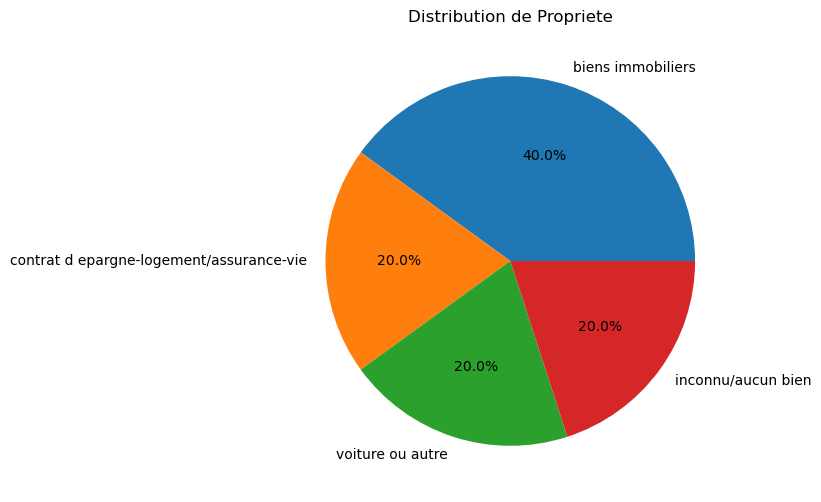

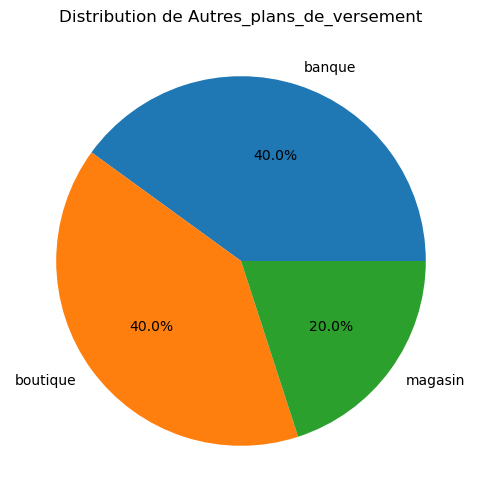

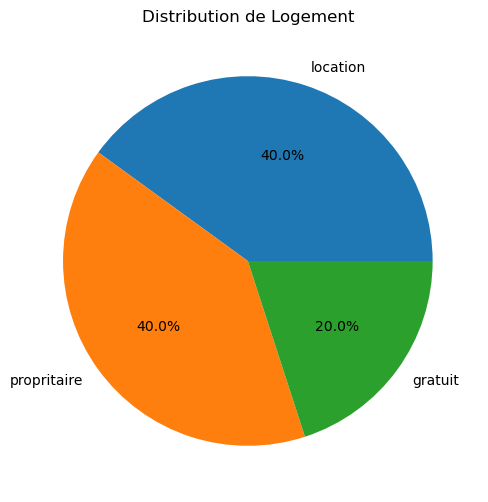

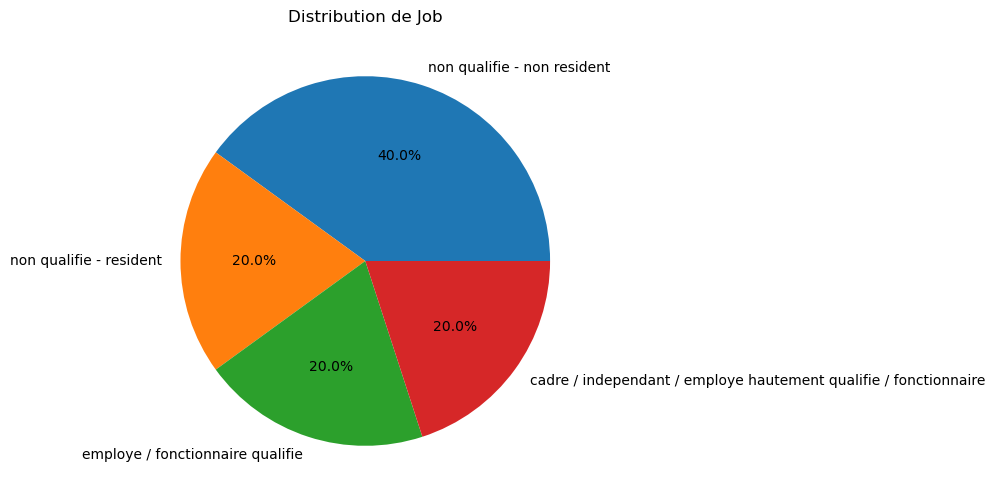

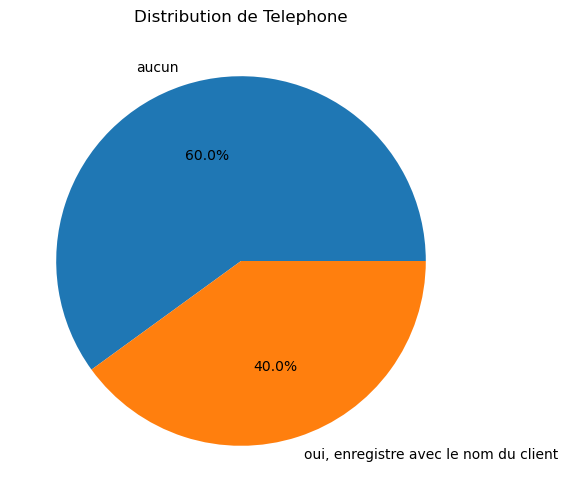

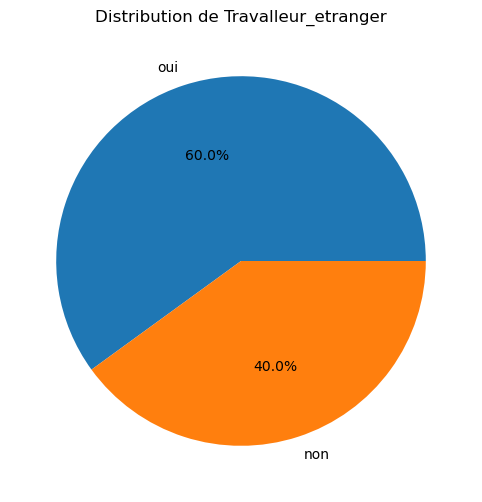

In [25]:
variables_categorielles = ["Statut_du_compte_de_controle_existant","Historique_credit","But","Obligations_sur_compte_epargne","Emploi_actuel_depuis",
                           "Status_personnel_et_sexe","Autres_débiteurs_ou_garants","Propriete","Autres_plans_de_versement","Logement","Job","Telephone",
                           "Travalleur_etranger"]

for var in variables_categorielles:
    distribution = df_german[var].value_counts()
    plt.figure(figsize=(8, 6))
    distribution.plot.pie(autopct='%1.1f%%')
    plt.title(f'Distribution de {var}')
    plt.ylabel('')
    plt.show()


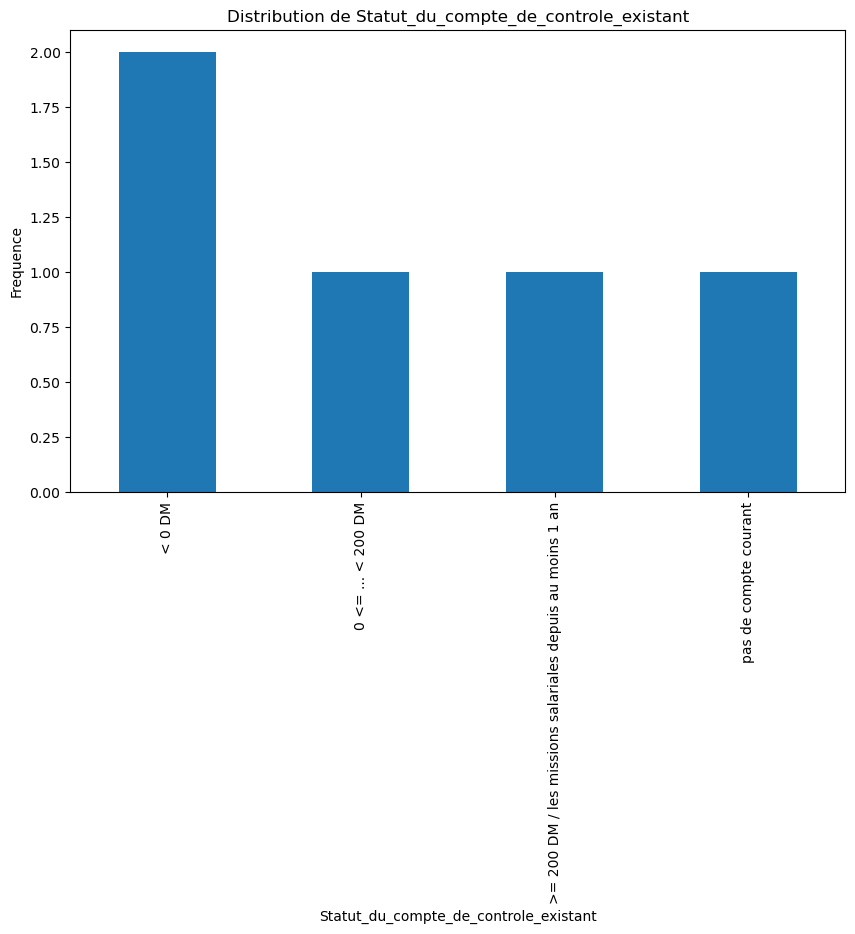

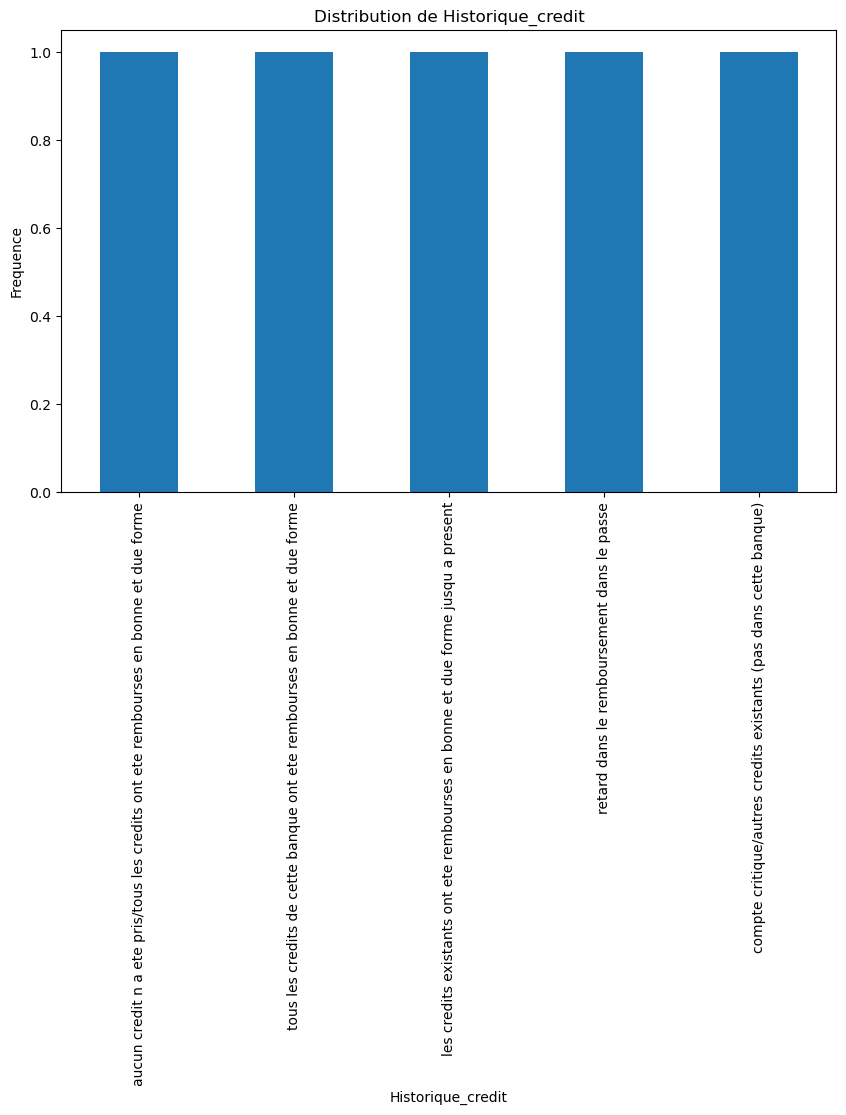

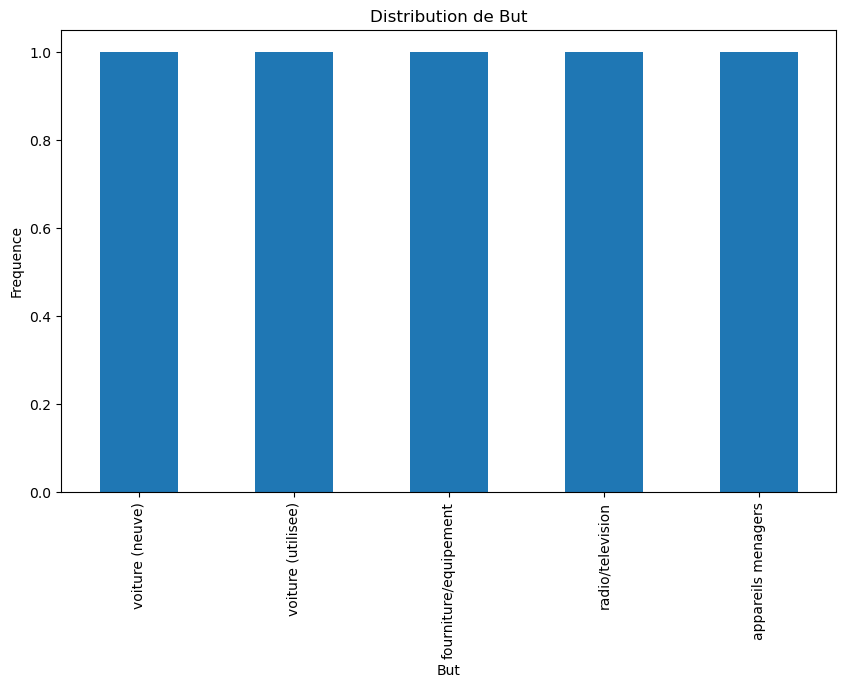

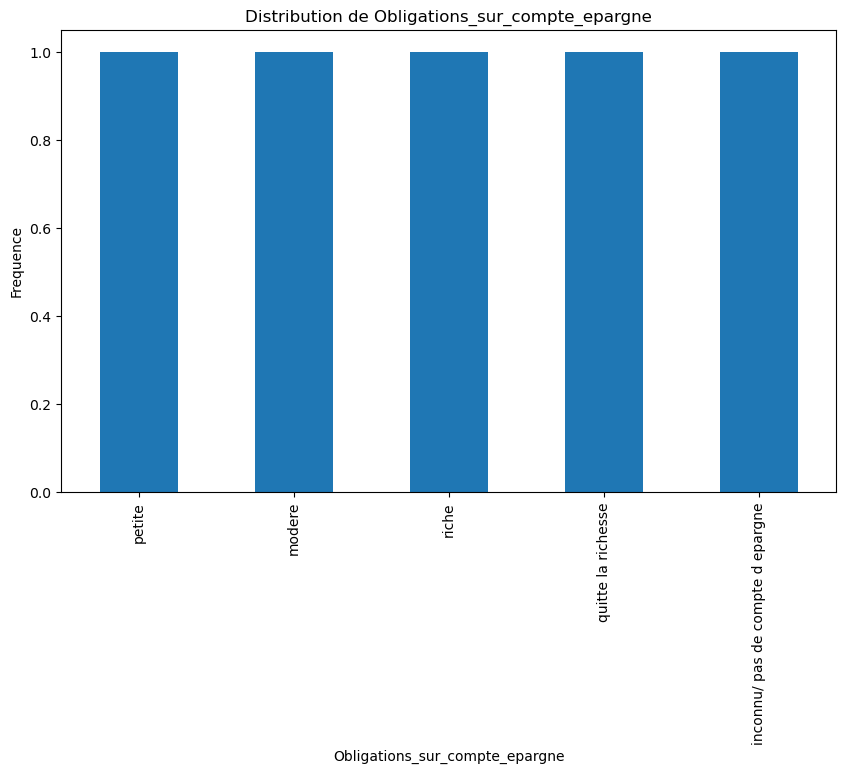

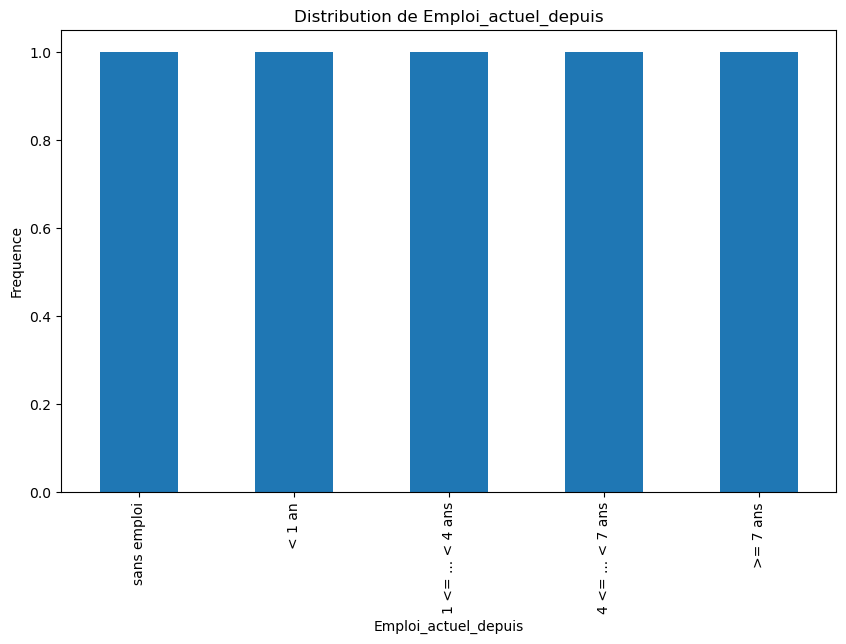

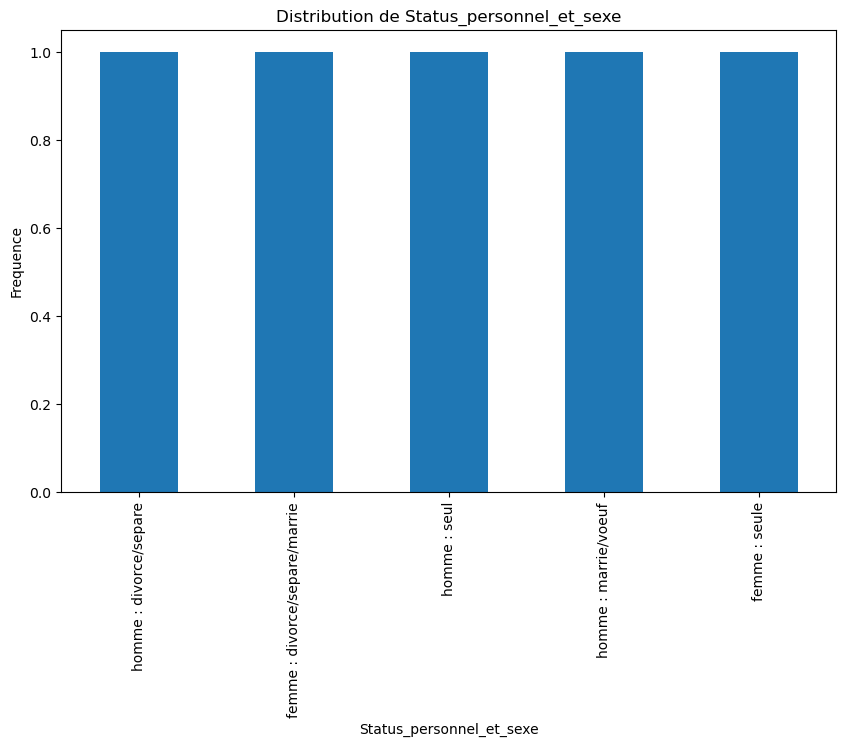

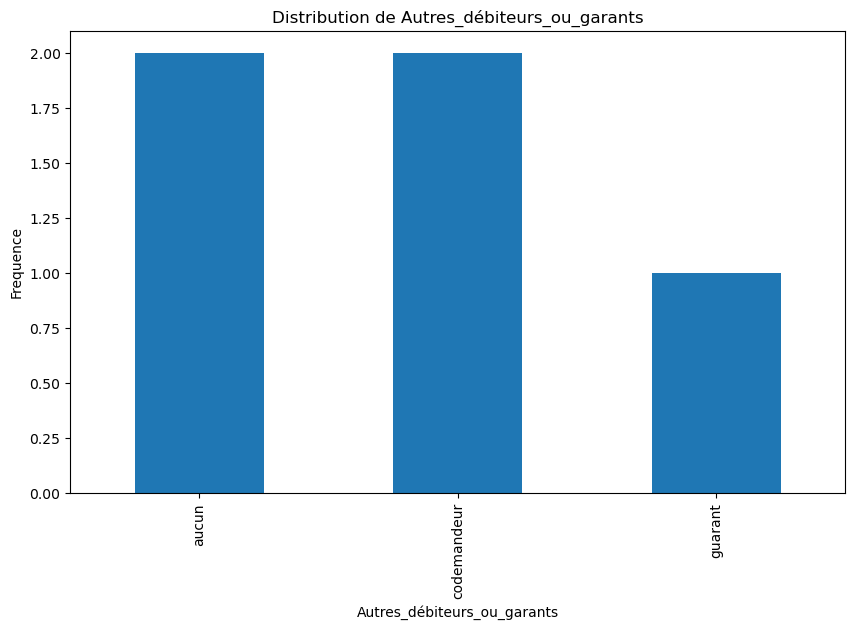

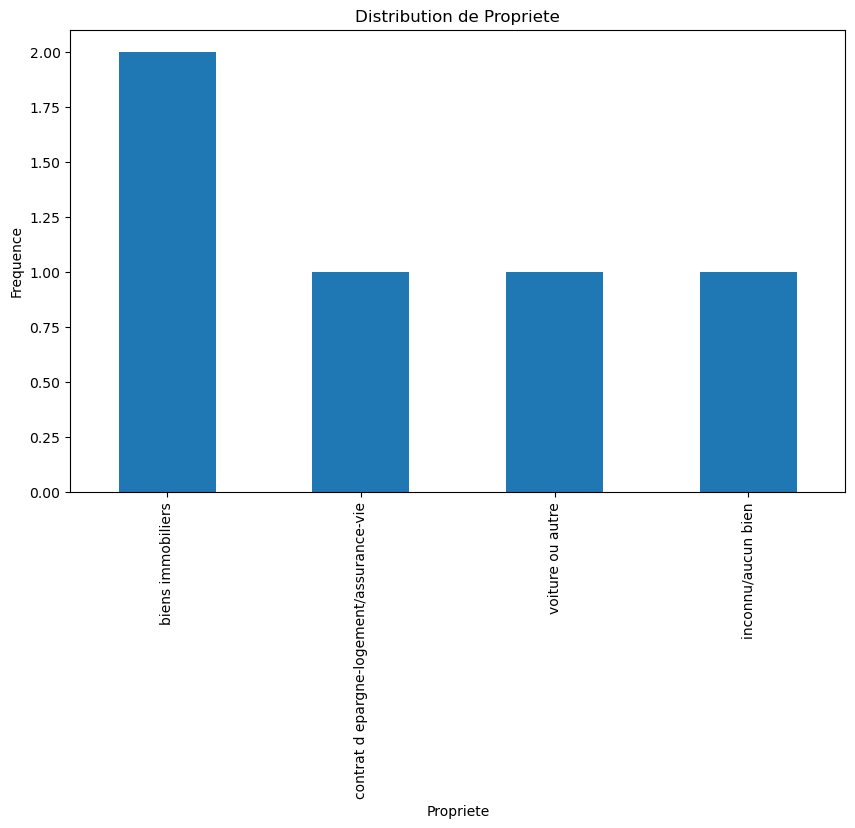

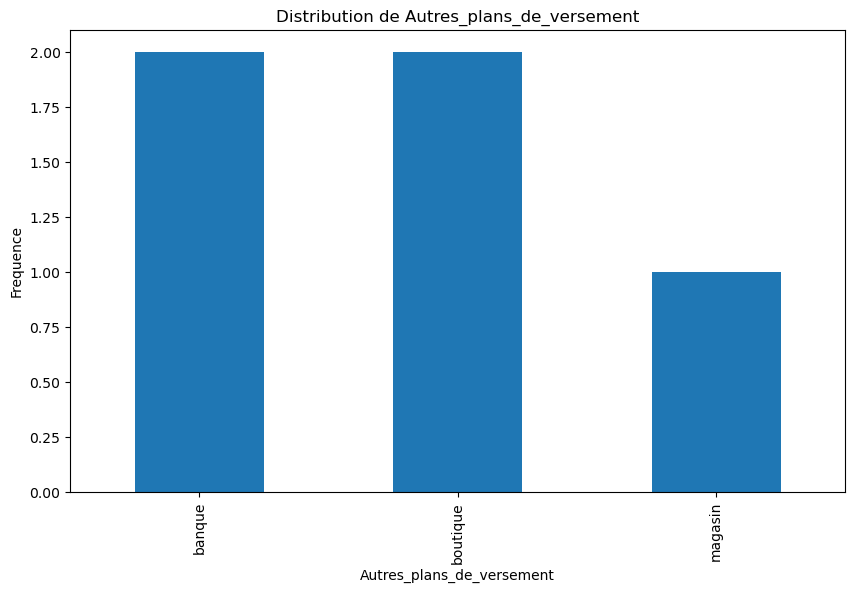

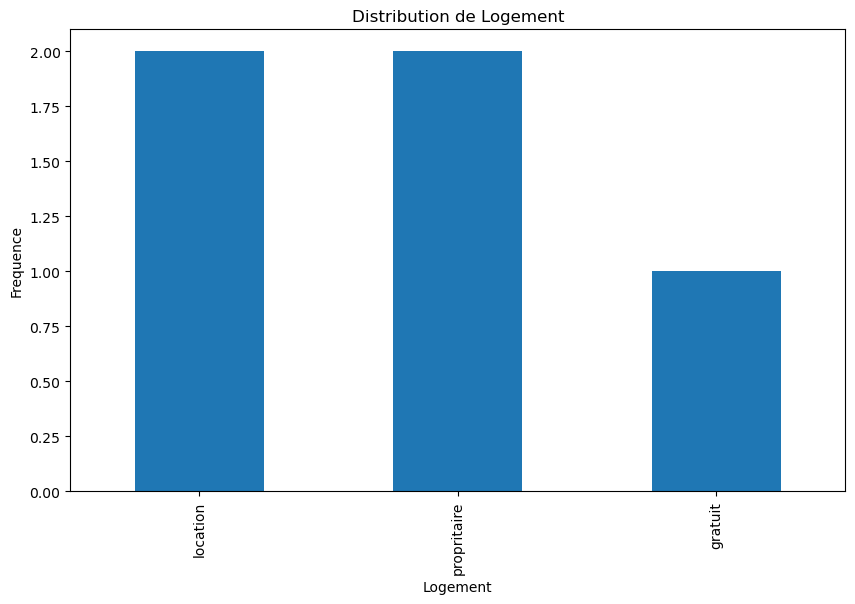

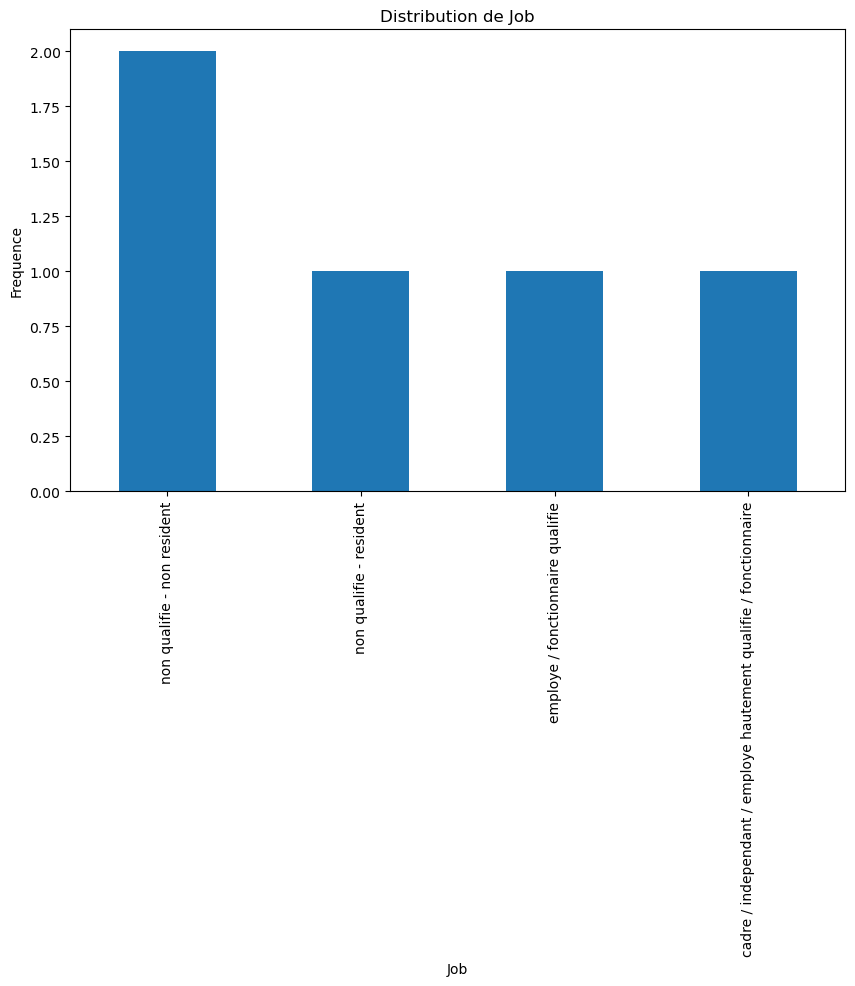

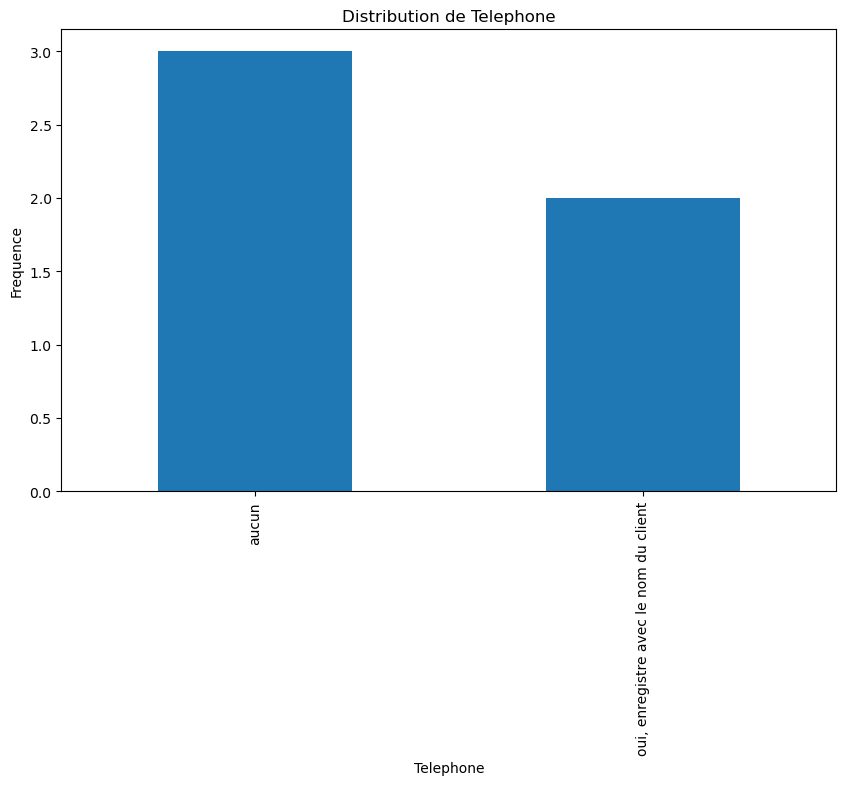

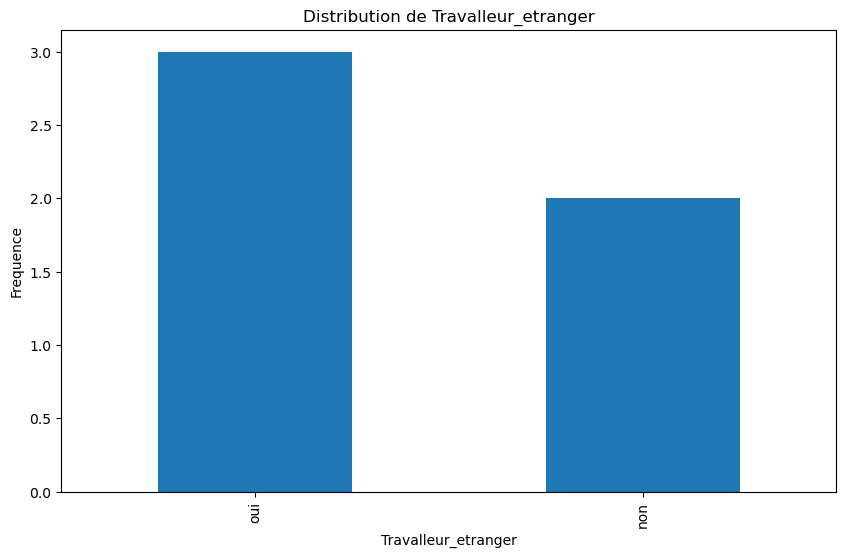

In [26]:
for var in variables_categorielles:
    distribution = df_german[var].value_counts()
    plt.figure(figsize=(10, 6))
    distribution.plot.bar()
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequence')
    plt.show()

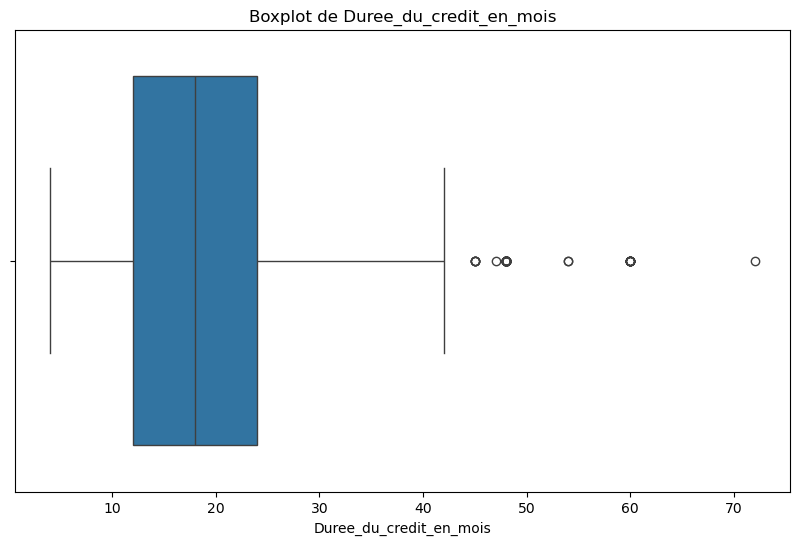

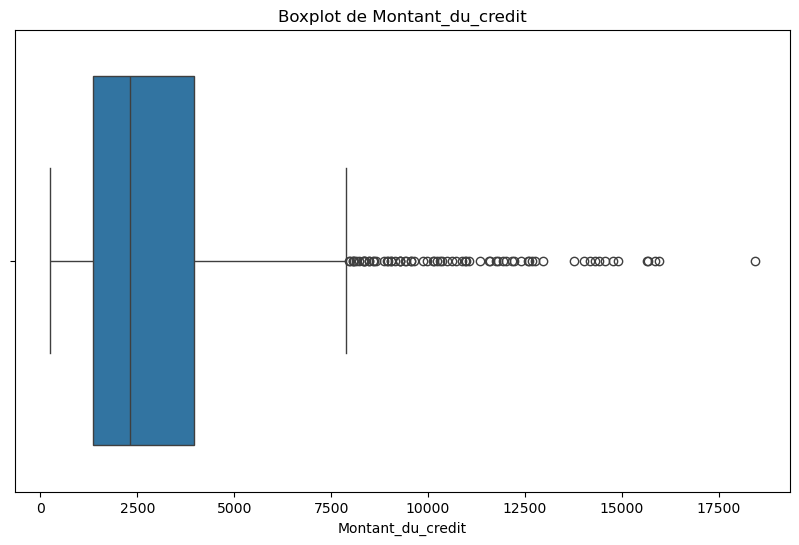

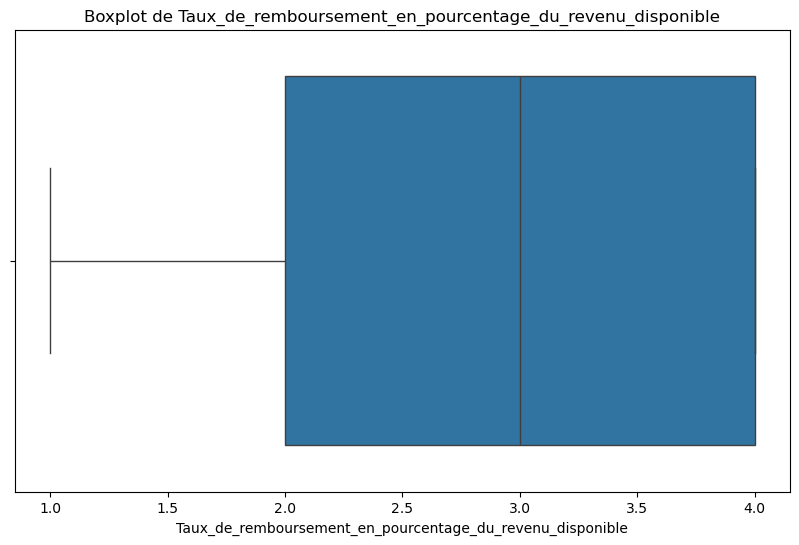

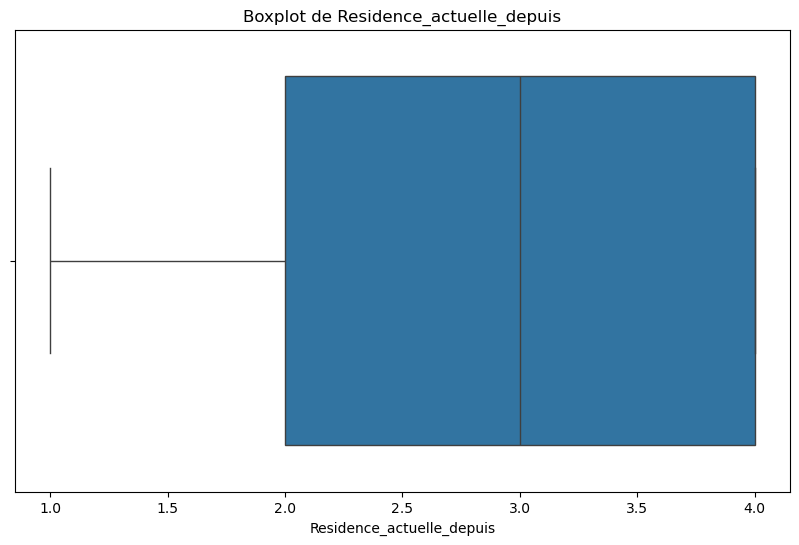

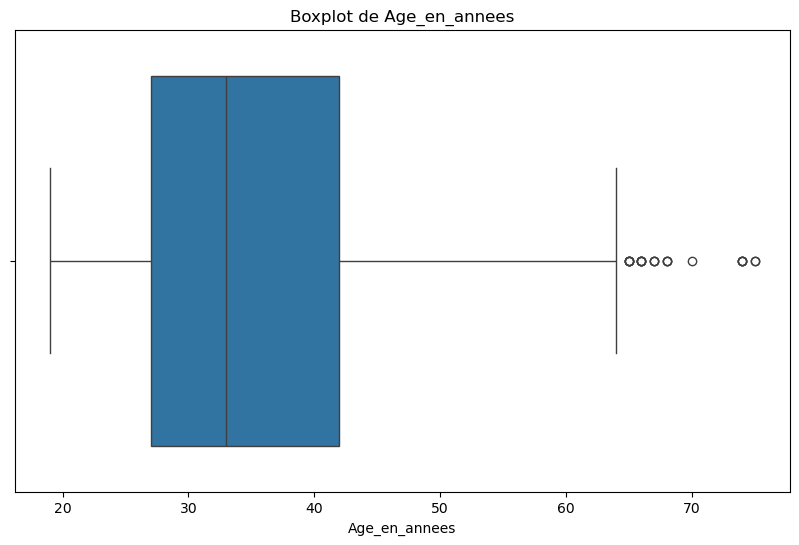

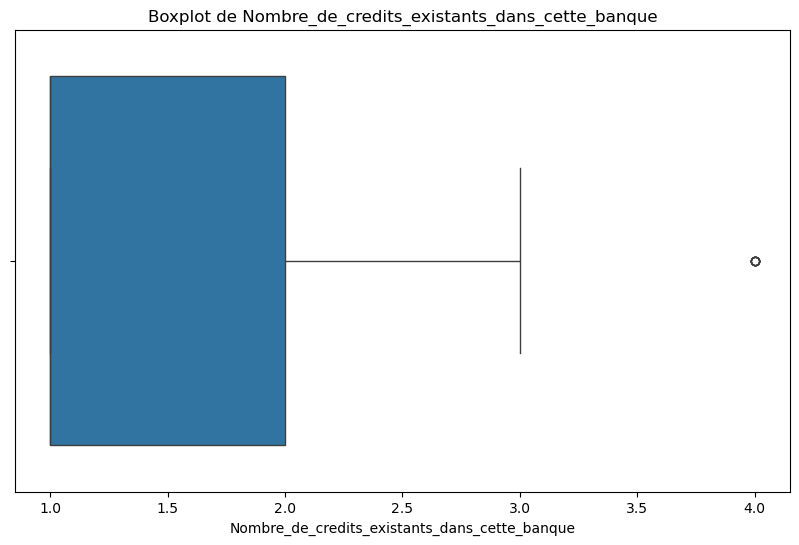

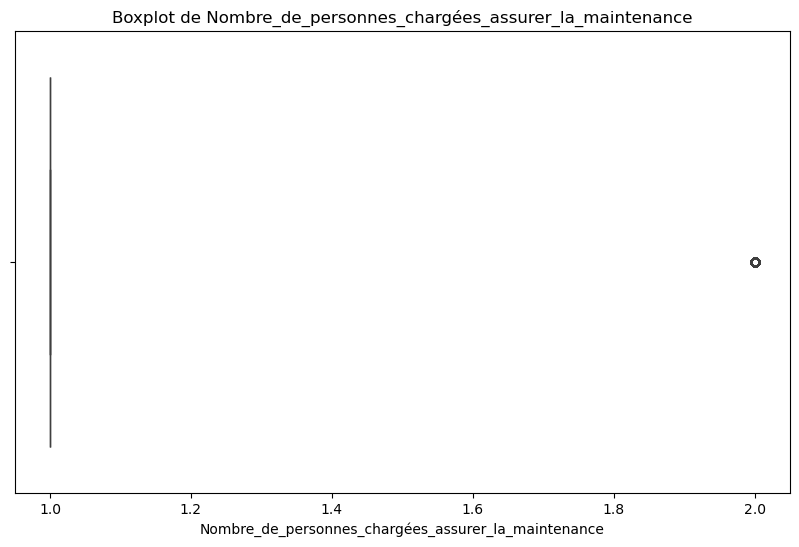

In [27]:
variables_numeriques = ["Duree_du_credit_en_mois", "Montant_du_credit","Taux_de_remboursement_en_pourcentage_du_revenu_disponible", "Residence_actuelle_depuis","Age_en_annees","Nombre_de_credits_existants_dans_cette_banque","Nombre_de_personnes_chargées_assurer_la_maintenance"]
for var in variables_numeriques:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_german_numeriques[var])
    plt.title(f'Boxplot de {var}')
    plt.show()


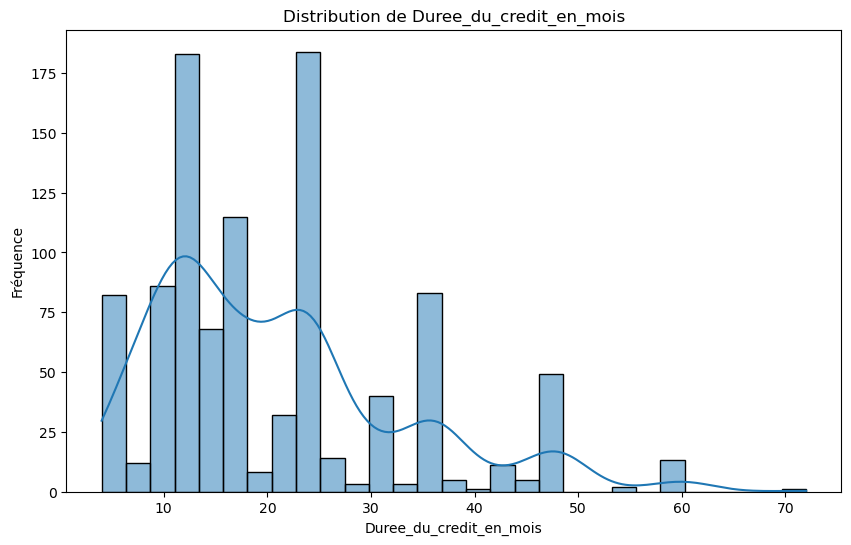

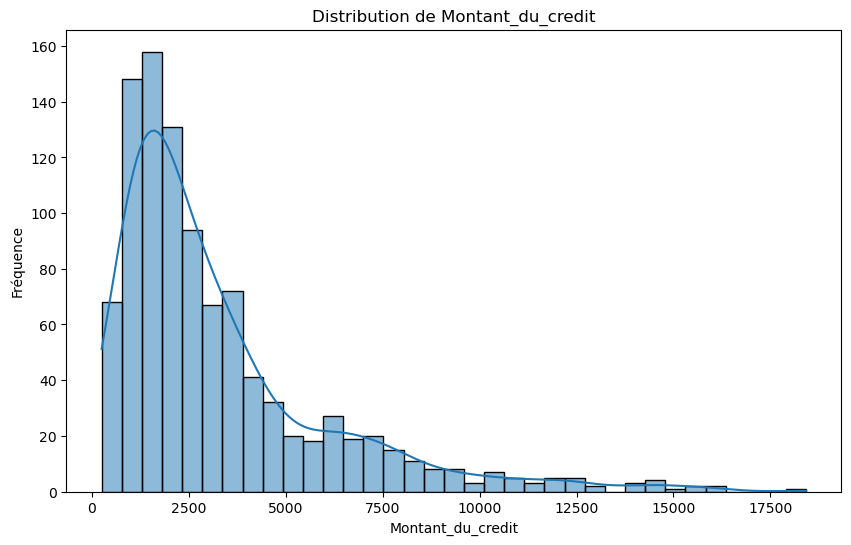

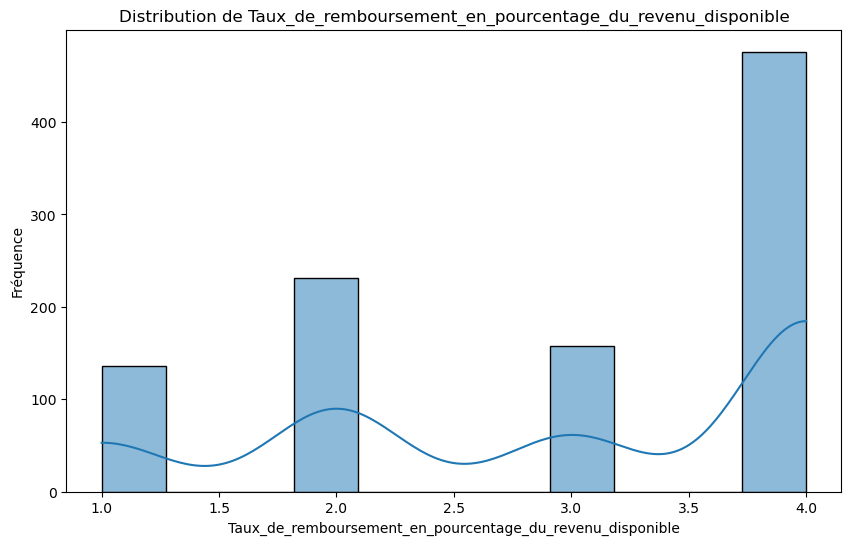

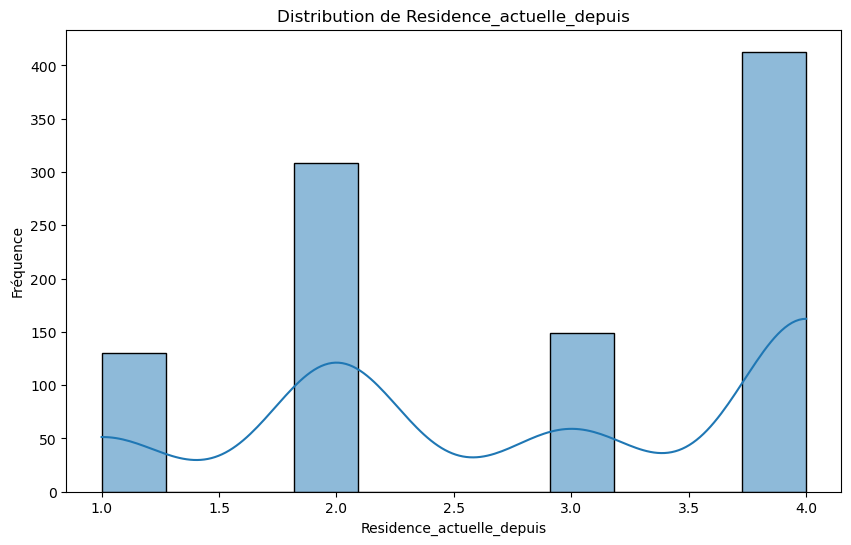

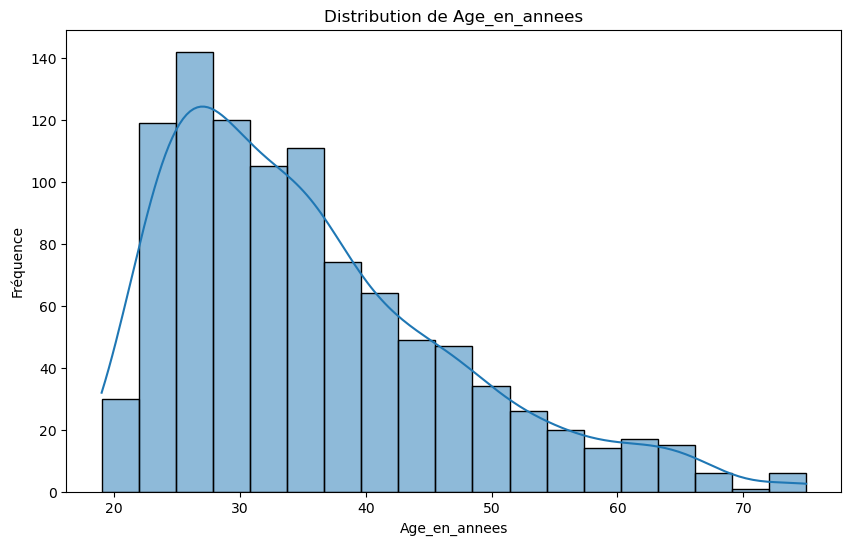

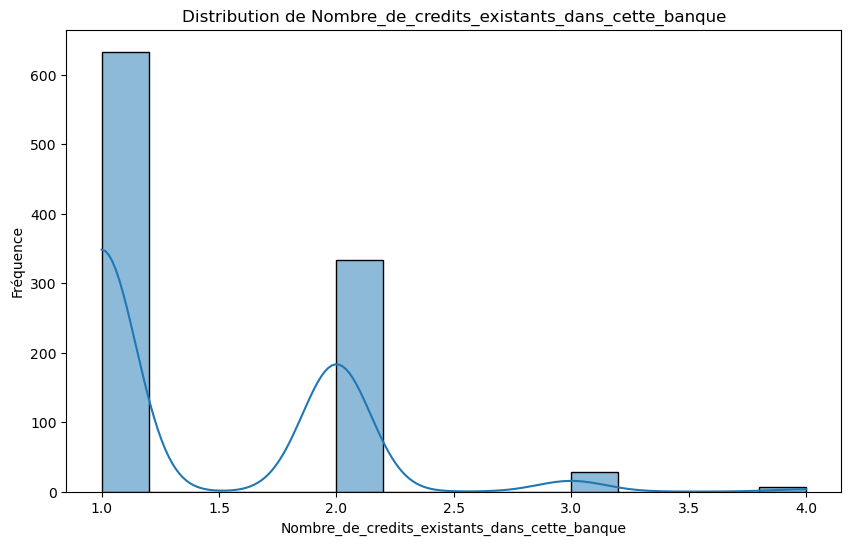

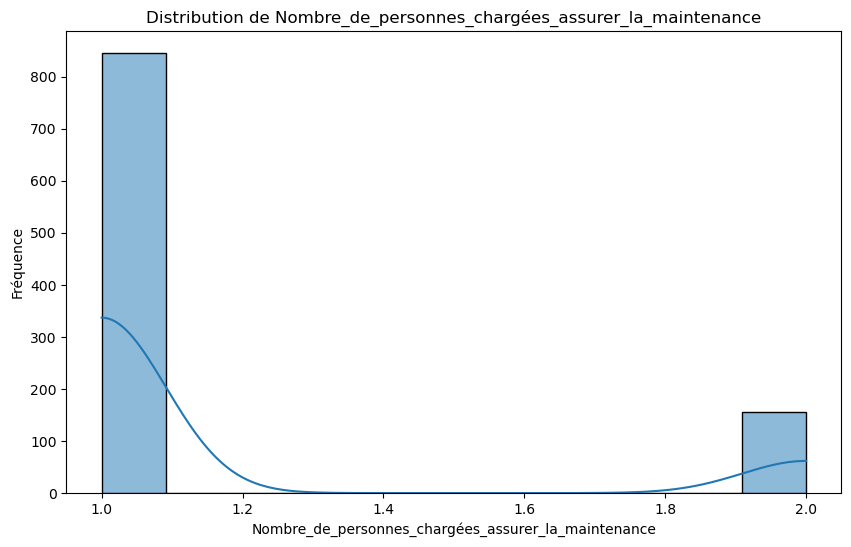

In [28]:
for var in variables_numeriques:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_german_numeriques[var], kde=True)
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()

# 3- Modele pour la classification (Regression Logistique)

## 3-1-Utilisons le one hot encoding pour l'encodage des variables non numeriques.

In [30]:
categorical_columns = ["Statut_du_compte_de_controle_existant","Historique_credit","But","Obligations_sur_compte_epargne","Emploi_actuel_depuis",
                           "Status_personnel_et_sexe","Autres_débiteurs_ou_garants","Propriete","Autres_plans_de_versement","Logement","Job","Telephone",
                           "Travalleur_etranger"]

# Utiliser l'encodage à chaud pour convertir les variables catégorielles en variables numériques
df_encoded = pd.get_dummies(df_credit_german, columns=categorical_columns, drop_first=True)
# Convertir les colonnes booléennes en entiers
df_encoded = df_encoded.astype(int)
df_encoded.head()


,Duree_du_credit_en_mois,Montant_du_credit,Taux_de_remboursement_en_pourcentage_du_revenu_disponible,Residence_actuelle_depuis,Age_en_annees,Nombre_de_credits_existants_dans_cette_banque,Nombre_de_personnes_chargées_assurer_la_maintenance,Statut_du_compte_de_controle_existant_< 0 DM,Statut_du_compte_de_controle_existant_>= 200 DM / les missions salariales depuis au moins 1 an,Statut_du_compte_de_controle_existant_pas de compte courant,...,Propriete_voiture ou autre,Autres_plans_de_versement_boutique,Autres_plans_de_versement_magasin,Logement_location,Logement_propritaire,Job_employe / fonctionnaire qualifie,Job_non qualifie - non resident,Job_non qualifie - resident,"Telephone_oui, enregistre avec le nom du client",Travalleur_etranger_oui
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,12,2096,2,3,49,1,2,0,1,0,...,1,0,1,0,0,1,0,0,0,1
3,42,7882,2,4,45,1,2,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,1,0,0,1


## 3-2- Verification de la colinéarité entre les variables

In [32]:
matrice_correlation = df_encoded.corr()


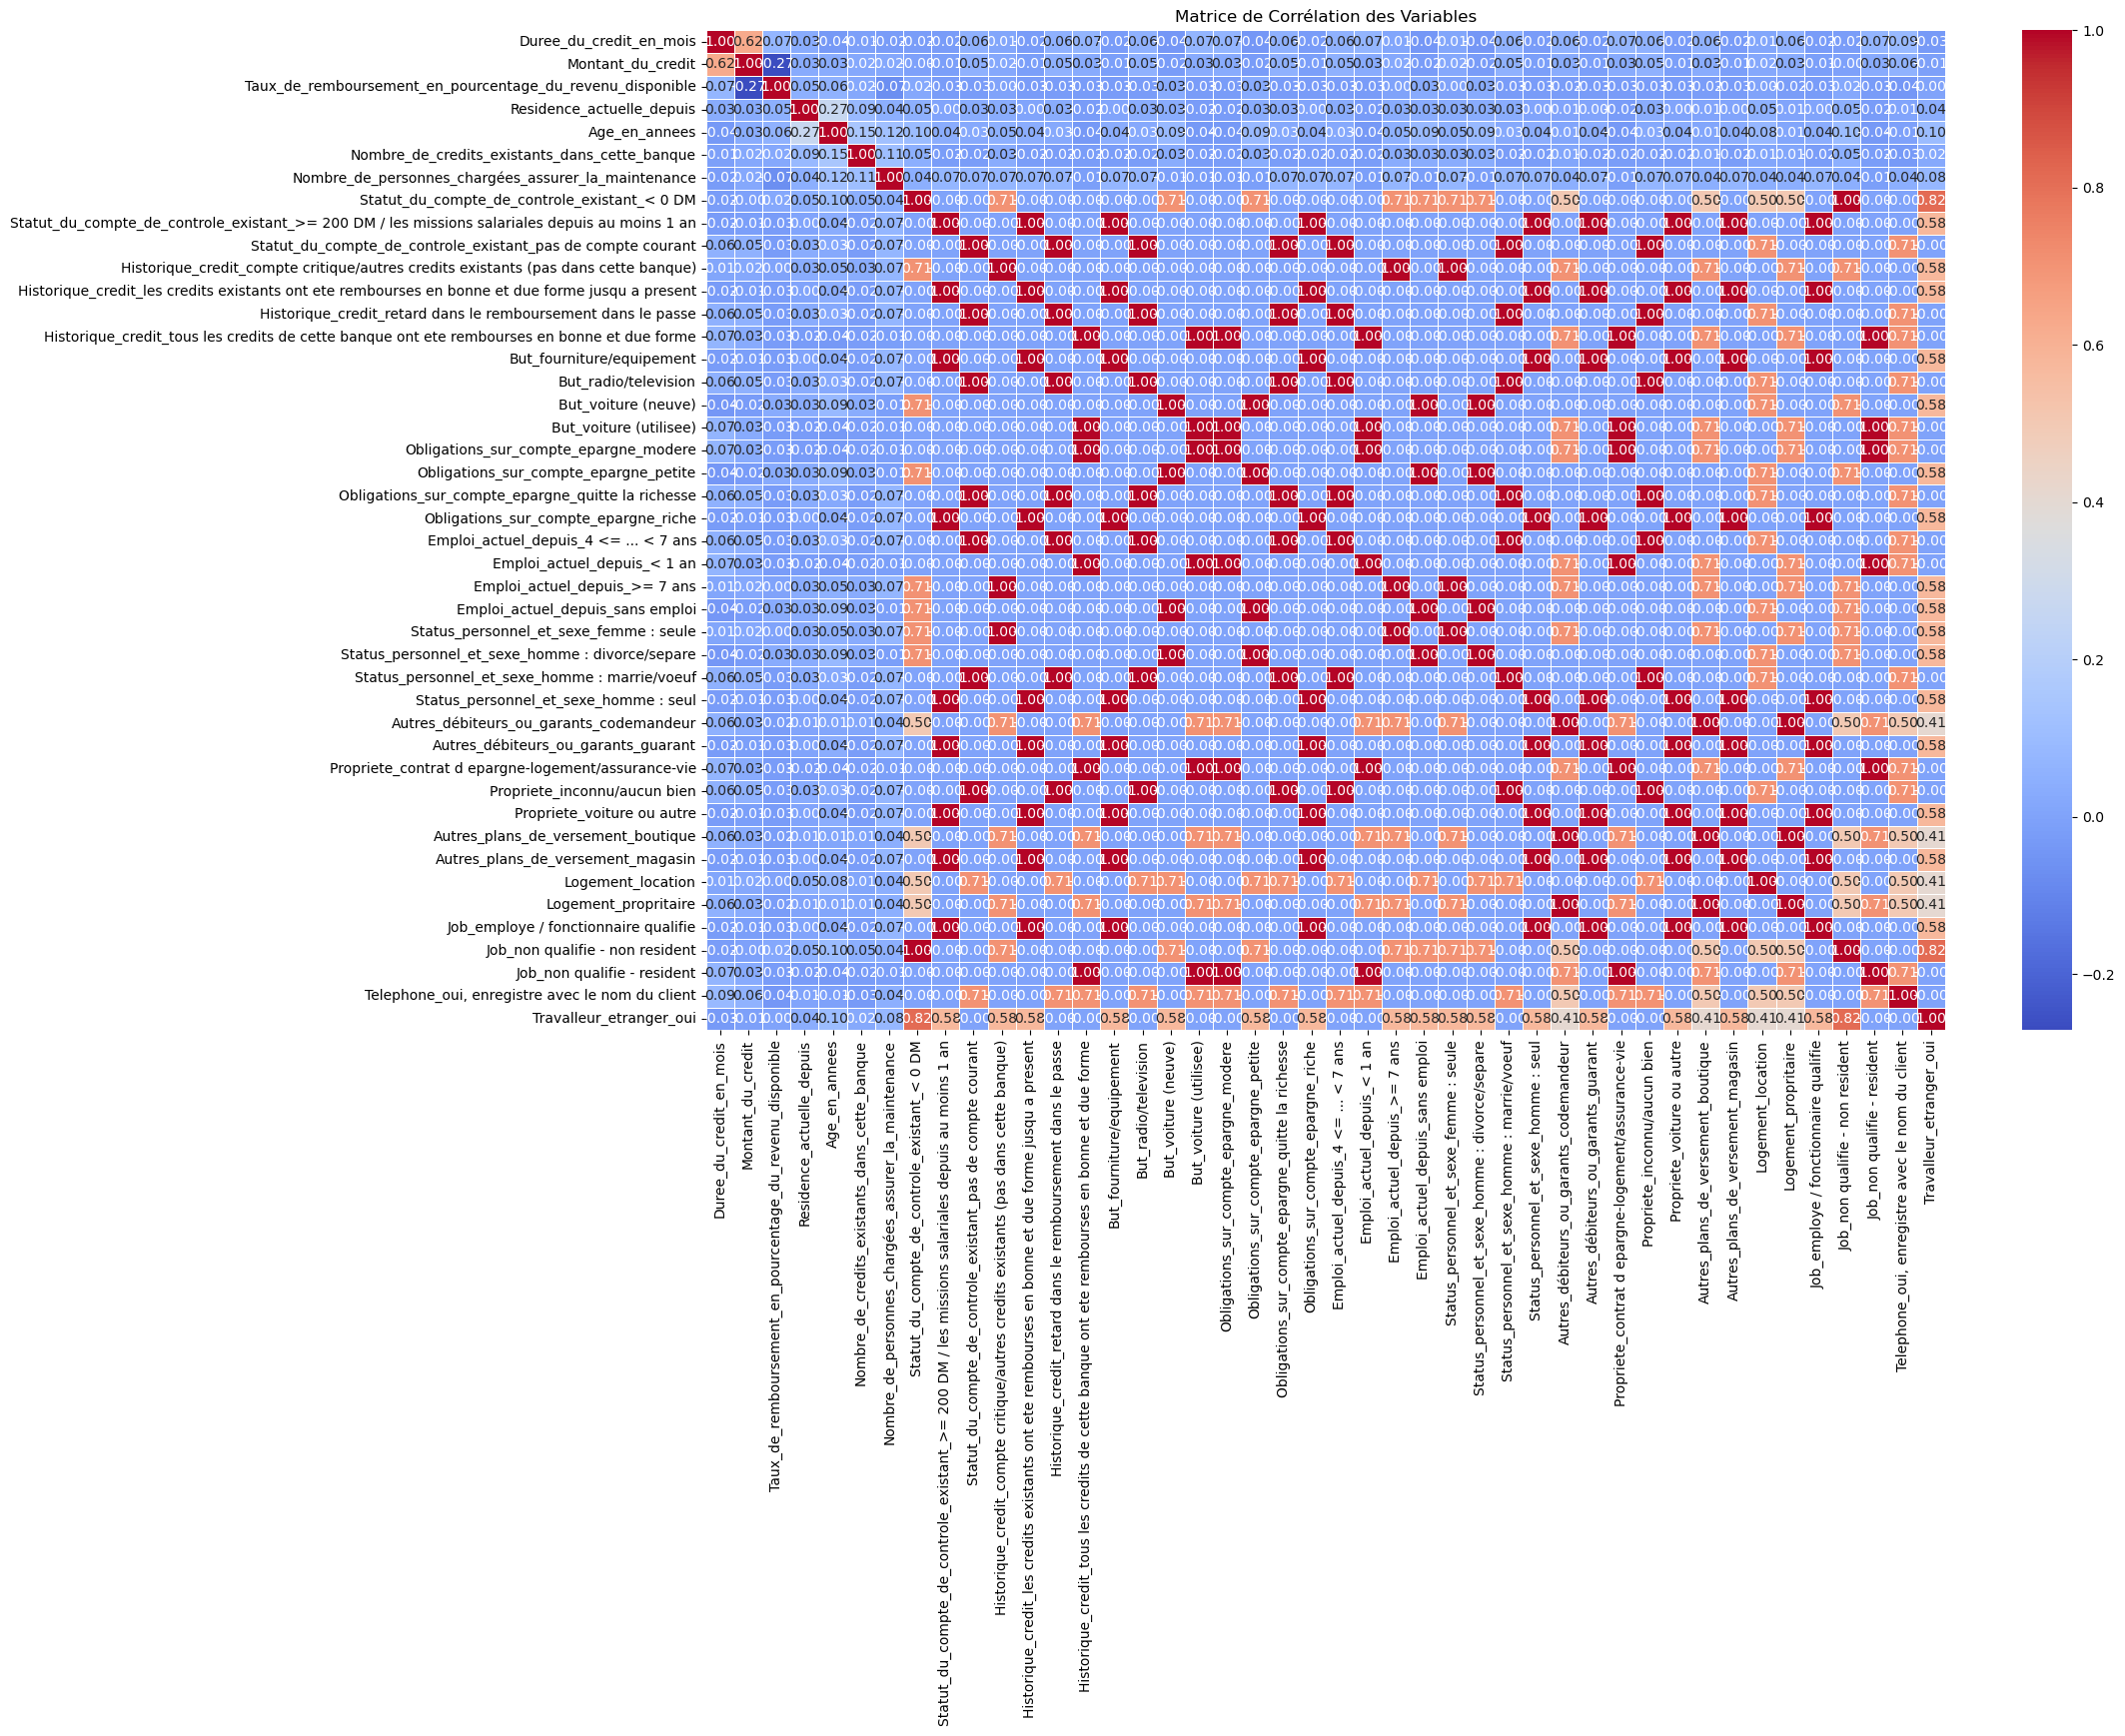

In [33]:
plt.figure(figsize=(20, 13))
sns.heatmap(matrice_correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation des Variables')
plt.show()


In [34]:
# Seuil de corrélation
seuil = 0.7

# Trouver les paires de variables corrélées au-dessus du seuil
correlated_features = set()
for i in range(len(matrice_correlation.columns)):
    for j in range(i):
        if abs(matrice_correlation.iloc[i, j]) > seuil:
            colname = matrice_correlation.columns[i]
            correlated_features.add(colname)

print("Variables fortement corrélées à exclure :", correlated_features)

# Exclure les variables corrélées
df_encoded_reduced = df_encoded.drop(columns=correlated_features)
df_encoded_reduced.head()


Variables fortement corrélées à exclure : {'But_radio/television', 'Historique_credit_retard dans le remboursement dans le passe', 'Autres_débiteurs_ou_garants_codemandeur', 'Emploi_actuel_depuis_sans emploi', 'But_voiture (utilisee)', 'Emploi_actuel_depuis_>= 7 ans', 'Job_non qualifie - non resident', 'Status_personnel_et_sexe_homme : divorce/separe', 'Status_personnel_et_sexe_homme : marrie/voeuf', 'Autres_plans_de_versement_boutique', 'Propriete_inconnu/aucun bien', 'Autres_plans_de_versement_magasin', 'Propriete_contrat d epargne-logement/assurance-vie', 'Status_personnel_et_sexe_femme : seule', 'Obligations_sur_compte_epargne_quitte la richesse', 'Emploi_actuel_depuis_< 1 an', 'Autres_débiteurs_ou_garants_guarant', 'Propriete_voiture ou autre', 'Job_non qualifie - resident', 'Historique_credit_les credits existants ont ete rembourses en bonne et due forme jusqu a present', 'Travalleur_etranger_oui', 'Job_employe / fonctionnaire qualifie', 'Historique_credit_compte critique/autres 

,Duree_du_credit_en_mois,Montant_du_credit,Taux_de_remboursement_en_pourcentage_du_revenu_disponible,Residence_actuelle_depuis,Age_en_annees,Nombre_de_credits_existants_dans_cette_banque,Nombre_de_personnes_chargées_assurer_la_maintenance,Statut_du_compte_de_controle_existant_< 0 DM,Statut_du_compte_de_controle_existant_>= 200 DM / les missions salariales depuis au moins 1 an,Statut_du_compte_de_controle_existant_pas de compte courant,Historique_credit_tous les credits de cette banque ont ete rembourses en bonne et due forme
0,6,1169,4,4,67,2,1,1,0,0,0
1,48,5951,2,2,22,1,1,0,0,0,1
2,12,2096,2,3,49,1,2,0,1,0,0
3,42,7882,2,4,45,1,2,0,0,1,0
4,24,4870,3,4,53,2,2,1,0,0,0


## decoupage des donnees encodées en entrainement et ebn validation

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_encoded_reduced, y, train_size = 0.8, random_state = 0)

print("Dimensions de X_train:", X_train.shape) 
print("Dimensions de y_train:", y_train.shape) 
print("Dimensions de X_test:", X_test.shape) 
print("Dimensions de y_test:", y_test.shape)


Dimensions de X_train: (800, 11)
Dimensions de y_train: (800, 1)
Dimensions de X_test: (200, 11)
Dimensions de y_test: (200, 1)


## Entrainons le modele avec la regression logistique

In [38]:
# Applatissons y en un tableau 1D
y_train = y_train.values.ravel()


In [39]:
# Vérifiez les classes présentes dans y_train
print("Classes présentes dans y_train:", np.unique(y_train))


Classes présentes dans y_train: [1 2]


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [41]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [42]:
# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Réel Négatif', 'Réel Positif'], 
                              columns=['Prédit Négatif', 'Prédit Positif'])
display(conf_matrix_df)

#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

coefficients = pd.DataFrame(model.coef_[0], index=df_encoded_reduced.columns, columns=['Coefficient'])
print(coefficients)


Accuracy: 0.71


,Prédit Négatif,Prédit Positif
Réel Négatif,131,11
Réel Positif,47,11


Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.92      0.82       142
           2       0.50      0.19      0.28        58

    accuracy                           0.71       200
   macro avg       0.62      0.56      0.55       200
weighted avg       0.67      0.71      0.66       200

                                                    Coefficient
Duree_du_credit_en_mois                                0.354472
Montant_du_credit                                      0.182618
Taux_de_remboursement_en_pourcentage_du_revenu_...     0.228456
Residence_actuelle_depuis                              0.022640
Age_en_annees                                         -0.229554
Nombre_de_credits_existants_dans_cette_banque         -0.103730
Nombre_de_personnes_chargées_assurer_la_mainten...     0.109877
Statut_du_compte_de_controle_existant_< 0 DM           0.070935
Statut_du_compte_de_controle_existant_>= 200 DM...    -0.130619
Statut_du

**Précision (Precision)**
- Classe 1 (74%) : le modèle a faites pour 74% de predictions correctes pour la classe 1.
- Classe 2 (50%) : le modèle a faites pour 50% de predictions correctes pour la classe 2.

**Rappel (Recall)**
- Classe 1 (92%) : le modèle a identifié correctement 92% des exemples réels de la classe 1. Le rappel est très élevé pour cette classe, montrant que le modèle ne manque que peu de vrais négatifs.
- Classe 2 (19%) : Par contre le modèle a identifié correctement seulement 19% des exemples réels de la classe 2. Le rappel est très faible pour cette classe, indiquant que le modèle manque beaucoup de vrais positifs.

**Score F1 (F1-Score)**
Classe 1 (82%) Le score F1, qui est la moyenne harmonique de la précision et du rappel, est élevé, montrant un bon équilibre entre précision et rappel pour la classe 1, mais tres desequilibré dans la prédiction de la seconde classe (27%).

**Support**
- Classe 1 (142) : Il y a 142 exemples de la classe 0 dans l'ensemble de test.
- Classe 2 (58) : Il y a 58 exemples de la classe 1 dans l'ensemble de test.

**Conclusion**
Le modèle montre des performances raisonnables avec une précision globale de 71%. Cependant, l'évaluation montre un déséquilibre significatif dans la performance entre les classes majoritaires et minoritaires 